# IDENTIFIKASI PERGERAKAN DAN PERAMALAN SAHAM TELKOM MENGGUNAKAN METODE ARIMA

## Data Preparation

In [38]:
import yfinance as yf
import pandas as pd

In [39]:
import yfinance as yf
import pandas as pd
data = yf.download('TLKM.JK', start = '2020-01-01', end = '2024-07-26')

[*********************100%%**********************]  1 of 1 completed


In [40]:
data.to_csv('TLKM.JK.csv')

In [41]:
df = pd.read_csv('TLKM.JK.csv')
df.to_csv('TLKM.csv')

In [42]:
# prompt: download df

from google.colab import files
files.download('TLKM.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [43]:
print(df)

            Date    Open    High     Low   Close    Adj Close     Volume
0     2020-01-02  3970.0  4000.0  3900.0  3910.0  3090.177979   52094000
1     2020-01-03  3960.0  3980.0  3930.0  3980.0  3145.500732   70032900
2     2020-01-06  3930.0  3970.0  3930.0  3960.0  3129.694092   42908900
3     2020-01-07  3930.0  3970.0  3920.0  3940.0  3113.887939   51837600
4     2020-01-08  3920.0  3950.0  3900.0  3900.0  3082.274658   52402600
...          ...     ...     ...     ...     ...          ...        ...
1098  2024-07-19  3200.0  3210.0  3120.0  3140.0  3140.000000  138117200
1099  2024-07-22  3180.0  3210.0  3090.0  3100.0  3100.000000  139383000
1100  2024-07-23  3140.0  3160.0  3100.0  3160.0  3160.000000   74338000
1101  2024-07-24  3140.0  3150.0  3040.0  3060.0  3060.000000   98752100
1102  2024-07-25  3080.0  3090.0  3030.0  3090.0  3090.000000   67060000

[1103 rows x 7 columns]


In [44]:
print(data)

              Open    High     Low   Close    Adj Close     Volume
Date                                                              
2020-01-02  3970.0  4000.0  3900.0  3910.0  3090.177979   52094000
2020-01-03  3960.0  3980.0  3930.0  3980.0  3145.500732   70032900
2020-01-06  3930.0  3970.0  3930.0  3960.0  3129.694092   42908900
2020-01-07  3930.0  3970.0  3920.0  3940.0  3113.887939   51837600
2020-01-08  3920.0  3950.0  3900.0  3900.0  3082.274658   52402600
...            ...     ...     ...     ...          ...        ...
2024-07-19  3200.0  3210.0  3120.0  3140.0  3140.000000  138117200
2024-07-22  3180.0  3210.0  3090.0  3100.0  3100.000000  139383000
2024-07-23  3140.0  3160.0  3100.0  3160.0  3160.000000   74338000
2024-07-24  3140.0  3150.0  3040.0  3060.0  3060.000000   98752100
2024-07-25  3080.0  3090.0  3030.0  3090.0  3090.000000   67060000

[1103 rows x 6 columns]


In [45]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1.103000e+03
mean,3684.315503,3725.040798,3639.891206,3681.178604,3252.537628,1.176748e+08
std,498.169479,496.809396,498.165589,499.834880,525.050133,7.955509e+07
min,2550.000000,2590.000000,2450.000000,2560.000000,2070.656250,0.000000e+00
25%,3270.000000,3320.000000,3210.000000,3250.000000,2809.639771,6.913620e+07
50%,3740.000000,3780.000000,3710.000000,3740.000000,3355.168945,9.738710e+07
75%,4040.000000,4080.000000,4000.000000,4040.000000,3694.278564,1.422633e+08
max,4850.000000,4850.000000,4720.000000,4770.000000,4295.701172,1.155861e+09


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1103 entries, 2020-01-02 to 2024-07-25
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1103 non-null   float64
 1   High       1103 non-null   float64
 2   Low        1103 non-null   float64
 3   Close      1103 non-null   float64
 4   Adj Close  1103 non-null   float64
 5   Volume     1103 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 60.3 KB


In [47]:
data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

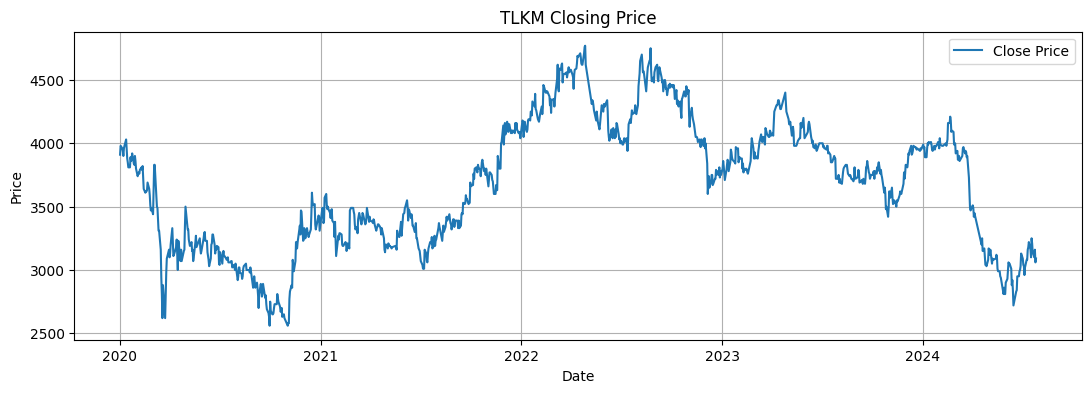

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13, 4))
plt.plot(data['Close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('TLKM Closing Price')
plt.legend()
plt.grid(True)
plt.show()

## Cek Stasioneran data

In [49]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(data['Close'])
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])

ADF Statistic: -1.852062
p-value: 0.354937


Uji data pertama menggunakan test ADF. Kita asumsikan :

*   H0 : Tidak Stasioner
*   H1 : Stasioner

Dengan hasil p-value yakni 0.341367 (yakni lebih besar dari 0.05, maka dapat disimpulkan data tidak stasioner) atau Tolak H1 dan Terima H0

<Figure size 1200x700 with 0 Axes>

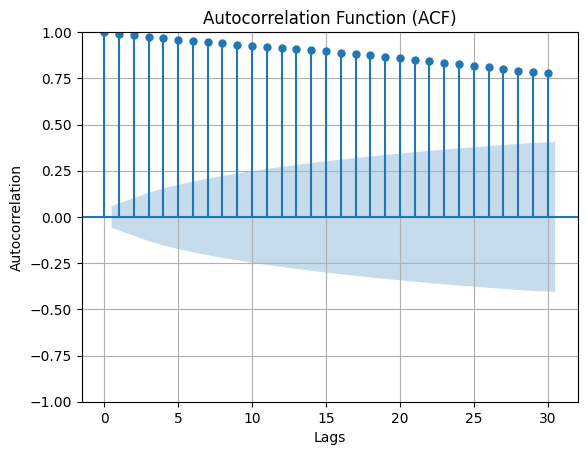

<Figure size 1200x700 with 0 Axes>

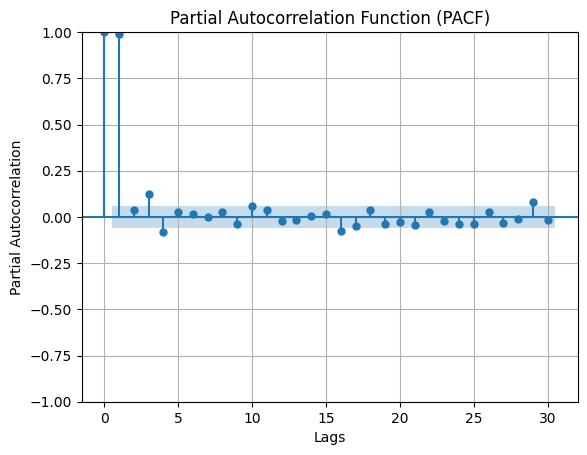

In [50]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF
plt.figure(figsize=(12, 7))
plot_acf(data['Close'], lags=30)
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.grid(True)
plt.show()

# Plot PACF
plt.figure(figsize=(12, 7))
plot_pacf(data['Close'], lags=30)
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.grid(True)
plt.show()

Selanjutnya, kita akan mengecek apakah data tersebut stasioner atau tidak dengan menggunakan plot. Dari plot ACF, dapat terlihat bahwa signifikan di semua lags. Sehingga, data sudah pasti tidak stasioner. Selanjutnya, kita harus menstasionerkan data dengan menggunakan Differencing.

## Differencing Data

In [51]:
data_diff = data['Close'].diff().dropna()

adf_test_diff = adfuller(data_diff)
print('ADF Statistic (Differenced): %f' % adf_test_diff[0])
print('p-value (Differenced): %f' % adf_test_diff[1])

ADF Statistic (Differenced): -19.540343
p-value (Differenced): 0.000000


<Figure size 1200x700 with 0 Axes>

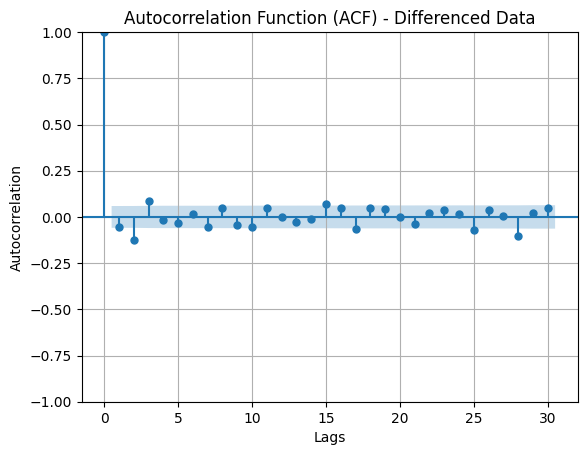

<Figure size 1200x700 with 0 Axes>

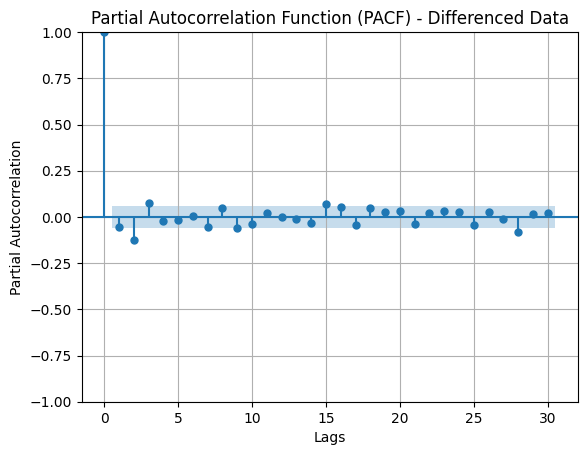

In [52]:
# Plot ACF dan PACF setelah differencing
plt.figure(figsize=(12, 7))
plot_acf(data_diff, lags=30)
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) - Differenced Data')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 7))
plot_pacf(data_diff, lags=30)
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF) - Differenced Data')
plt.grid(True)
plt.show()


Setelah dilakukan Differencing satu kali, bisa kita lihat bahwa setelah dilakukan kembali uji ADF yakni nilai p-value lebih kecil dari alpha. Lalu, pada plot ACF tidak terlihat lagi signifikansi di setiap lags seperti sebelumnya.

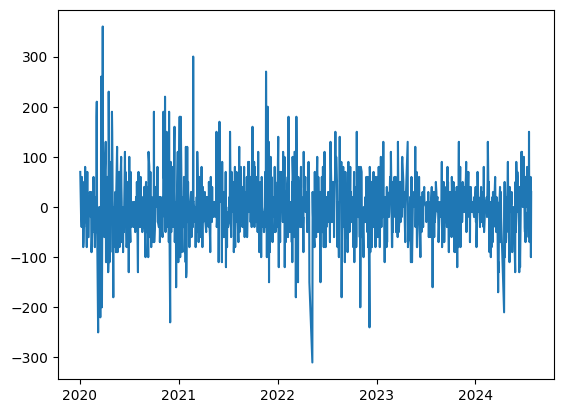

In [53]:
plt.plot(data_diff)

## Penentuan Parameter Model

Dengan melihat hasil plot ACF dan PACF yang telah di stasionerkan, kita dapat menentukan secara manual ordo model ARIMA yakni ARIMA (1,1,1). Namun, saya rasa kurang maksimal jika hanya bergantung pada satu faktor. Selanjutnya, saya akan membuat autoarima yang nanti hasilnya akan saya bandingkan dengan penentuan manual.

In [54]:
from statsmodels.tsa.arima.model import ARIMA

In [55]:
model_1 = ARIMA(data_diff, order=(1, 1, 1))
model_1_hasil = model_1.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [56]:
!pip install pmdarima
import pmdarima as pm

In [57]:
model_2 = pm.auto_arima(data_diff,
                      seasonal=False,
                      start_p=0, start_q=0,
                      max_p=5, max_q=5,
                      d=1,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=13183.203, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=12915.999, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.29 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=13181.204, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=12671.492, Time=1.30 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=12608.313, Time=0.51 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=12564.847, Time=0.53 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=12529.356, Time=0.52 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=5.35 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=5.48 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=12527.357, Time=1.50 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=12562.848, Time=0.49 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=inf, Time=4.58 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=inf, Time=2.90 sec

Best model:  ARIMA(5,1,0)(0,0,0)[0]          
To

In [58]:
model_2 = ARIMA(data_diff, order=(5, 1, 0))
model_2_hasil = model_2.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



**Didapatkan 2 model, selanjutnya dilakukan uji guna mendapatkan model terbaik**
*   Model 1 = ARIMA (1,1,1)
*   Model 2 = ARIMA (5,1,0)



## Analisis Diagnostik

In [59]:
hasil_model_1 = model_1_hasil.summary()
print(hasil_model_1)

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1102
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -6182.289
Date:                Tue, 30 Jul 2024   AIC                          12370.577
Time:                        13:42:08   BIC                          12385.589
Sample:                             0   HQIC                         12376.256
                               - 1102                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0515      0.024     -2.152      0.031      -0.098      -0.005
ma.L1         -0.9999      0.089    -11.179      0.000      -1.175      -0.825
sigma2      4385.4333    404.445     10.843      0.0

In [60]:
hasil_model_2 = model_2_hasil.summary()
print(hasil_model_2)

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1102
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -6257.679
Date:                Tue, 30 Jul 2024   AIC                          12527.357
Time:                        13:42:08   BIC                          12557.381
Sample:                             0   HQIC                         12538.715
                               - 1102                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8675      0.025    -34.513      0.000      -0.917      -0.818
ar.L2         -0.8055      0.035    -23.315      0.000      -0.873      -0.738
ar.L3         -0.5315      0.035    -15.008      0.0

## Forecast

## Menggunakan model ARIMA(1,1,1)

In [62]:
train_size = int(len(data_diff) * 0.8)
X_train = data_diff[:train_size]
X_test = data_diff[train_size:]

In [63]:
print(f"Ukuran data pelatihan: {len(X_train)}")
print(f"Ukuran data pengujian: {len(X_test)}")
print("Data Pelatihan:")
print(X_train.head())
print("\nData Pengujian:")
print(X_test.head())

Ukuran data pelatihan: 881
Ukuran data pengujian: 221
Data Pelatihan:
Date
2020-01-03    70.0
2020-01-06   -20.0
2020-01-07   -20.0
2020-01-08   -40.0
2020-01-09    60.0
Name: Close, dtype: float64

Data Pengujian:
Date
2023-08-21   -20.0
2023-08-22    10.0
2023-08-23   -10.0
2023-08-24   -20.0
2023-08-25     0.0
Name: Close, dtype: float64


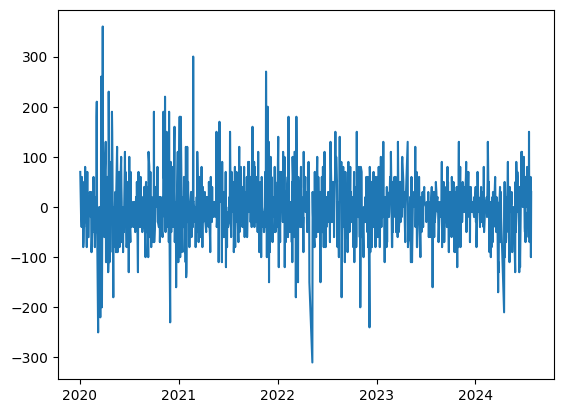

In [64]:
plt.plot(data_diff)

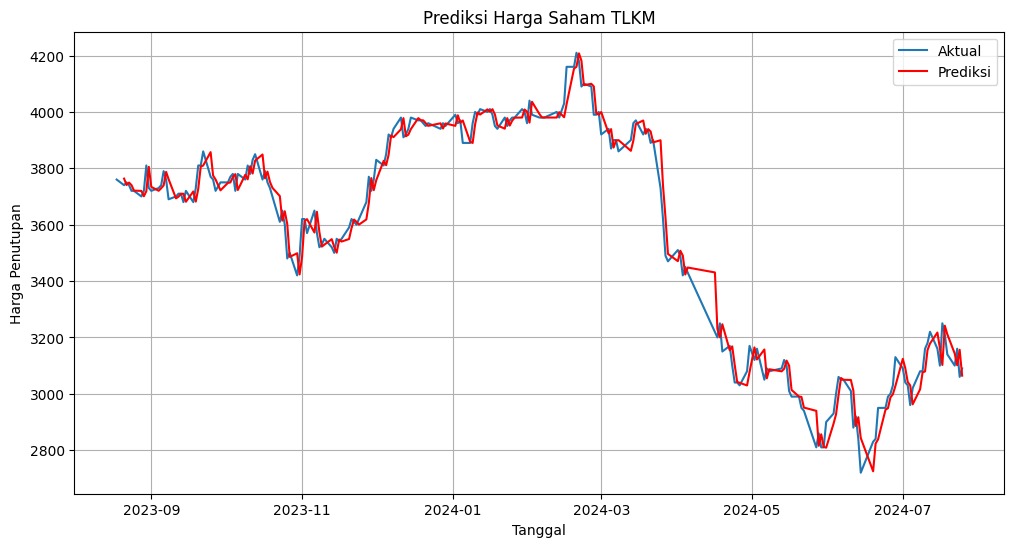

In [ ]:
predictions = model_1_hasil.predict(start=len(X_train), end=len(data_diff)-1)

# Transformasi data
predictions_original = predictions + data['Close'].shift(1).iloc[train_size:]
actual_original = data['Close'].iloc[train_size:]

# Plot data prediksi aktual
plt.figure(figsize=(12, 6))
plt.plot(actual_original, label='Aktual')
plt.plot(predictions_original, color='red', label='Prediksi')
plt.xlabel('Tanggal')
plt.ylabel('Harga Penutupan')
plt.title('Prediksi Harga Saham TLKM')
plt.legend()
plt.grid(True)
plt.show()

In [66]:
df = pd.DataFrame({'Aktual': actual_original, 'Prediksi': predictions_original})
print(df)

            Aktual     Prediksi
Date                           
2023-08-18  3760.0          NaN
2023-08-21  3740.0  3763.426011
2023-08-22  3750.0  3740.824053
2023-08-23  3740.0  3749.289272
2023-08-24  3720.0  3740.308870
...            ...          ...
2024-07-19  3140.0  3211.386005
2024-07-22  3100.0  3142.865945
2024-07-23  3160.0  3101.281594
2024-07-24  3060.0  3156.184512
2024-07-25  3090.0  3064.337883

[222 rows x 2 columns]
